In [1]:
from yugiquery import *
header('Speed Duel')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Speed Duel - Execution started 19/02/2023 19:04 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Skill cards](#Skill-cards)
        *   [3.1.1  Character](#Character)
        *   [3.1.2  Property](#Property)
    *   [3.2  Property](#Property)
    *   [3.3  Archseries](#Archseries)
    *   [3.4  TCG Speed Duel status](#TCG-Speed-Duel-status)
        *   *   [3.4.0.1  By card type](#By-card-type)
            *   [3.4.0.2  By monster type](#By-monster-type)
            *   [3.4.0.3  By archseries](#By-archseries)
        *   [3.4.1  TCG Speed Duel vs. TCG status](#TCG-Speed-Duel-vs.-TCG-status)
*   [4  Epilogue](#Epilogue)
    *   [4.1  HTML export](#HTML-export)
<!--     *   [4.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch skill cards
skill_df = fetch_skill()

# Fetch deck cards
speed_df = fetch_speed()

103 results



893 results



## Merge data

In [4]:
full_df = pd.concat([speed_df,skill_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
print('Data merged')

Data merged


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../data/all_speed_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if files_list:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[0], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Secondary type'] = previous_df['Secondary type'].dropna().apply(literal_eval)
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    # previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df[previous_df.columns].dtypes.to_dict())
    previous_ts = pd.to_datetime(os.path.basename(files_list[0]).split('_')[-1].rstrip('.csv'))
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    changelog = None
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/speed_changelog_{timestamp.isoformat(timespec="minutes")}_{previous_ts.isoformat(timespec="minutes")}.csv', index = True)
        print('Changelog saved')

No changes


## Save data

In [7]:
if changelog is not None and changelog.empty:
    print('No changes. New data not saved')
else:
    full_df.to_csv(f'../data/all_speed_{timestamp.isoformat(timespec="minutes")}.csv', index=False)
    print('Data saved')

No changes. New data not saved


# Data visualization

In [8]:
full_df

,Name,Password,Card type,Property,Archseries,Attribute,Primary type,Secondary type,Monster type,Effect type,DEF,ATK,Level/Rank,TCG status,OCG status,TCG Speed Duel status,Page name,Page URL,Artwork,Modification date,Character
0,7 Completed,86198326,Spell Card,Equip Spell Card,NaN,NaN,NaN,NaN,NaN,"(Condition, Continuous-like Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Unlimited,7 Completed,https://yugipedia.com/wiki/7_Completed,NaN,2021-10-31 17:18:50,NaN
1,A Cat of Ill Omen,24140059,Monster Card,NaN,NaN,DARK,Effect Monster,"(Flip monster,)",Beast,"(Flip effect,)",300,500,2,Unlimited,Unlimited,Unlimited,A Cat of Ill Omen,https://yugipedia.com/wiki/A_Cat_of_Ill_Omen,NaN,2022-04-11 17:39:44,NaN
2,A Hero Emerges,21597117,Trap Card,Normal Trap Card,NaN,NaN,NaN,NaN,NaN,"(Activation condition, Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Unlimited,A Hero Emerges,https://yugipedia.com/wiki/A_Hero_Emerges,NaN,2022-03-21 20:21:26,NaN
3,A Hero Lives,08949584,Spell Card,Normal Spell Card,NaN,NaN,NaN,NaN,NaN,"(Activation condition, Cost, Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Unlimited,A Hero Lives,https://yugipedia.com/wiki/A_Hero_Lives,NaN,2022-11-02 12:48:15,NaN
4,A Legendary Ocean,00295517,Spell Card,Field Spell Card,"(Umi (series),)",NaN,NaN,NaN,NaN,"(Condition, Continuous-like Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Unlimited,A Legendary Ocean,https://yugipedia.com/wiki/A_Legendary_Ocean,NaN,2022-11-04 14:25:19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Zoma the Spirit,79852326,Trap Card,Continuous Trap Card,"(Trap Monster,)",NaN,NaN,NaN,NaN,"(Effect, Trigger Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Unlimited,Zoma the Spirit,https://yugipedia.com/wiki/Zoma_the_Spirit,NaN,2022-09-02 12:21:41,NaN
992,Zombie Master,NaN,Skill Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illegal,NaN,Legal,Zombie Master (Skill Card),https://yugipedia.com/wiki/Zombie_Master_(Skil...,NaN,2022-12-27 15:38:32,Bonz
993,Zombie Tiger,47693640,Monster Card,NaN,NaN,EARTH,Effect Monster,"(Union monster,)",Zombie,"(Condition, Continuous-like Effect, Ignition E...",1600,1400,3,Unlimited,Unlimited,Unlimited,Zombie Tiger,https://yugipedia.com/wiki/Zombie_Tiger,NaN,2022-07-24 09:37:57,NaN
994,Zombina,81616639,Monster Card,NaN,NaN,EARTH,Effect Monster,NaN,Zombie,"(Trigger Effect,)",1500,1400,4,Unlimited,Unlimited,Unlimited,Zombina,https://yugipedia.com/wiki/Zombina,NaN,2022-05-24 15:59:37,NaN


## Skill cards

### Character

In [9]:
print('Total number of characters portrayed in skill cards:', skill_df['Character'].nunique())

Total number of characters portrayed in skill cards: 36


In [10]:
skill_df.drop('Card type', axis=1).sort_values('Character')

,Name,Property,Archseries,Character,TCG status,TCG Speed Duel status,Page name,Page URL,Modification date
57,Machine Angel Ascension,NaN,"(Machine Angel,)",Alexis Rhodes,Illegal,Legal,Machine Angel Ascension,https://yugipedia.com/wiki/Machine_Angel_Ascen...,2022-09-01 17:38:41
17,Cyber Blade Fusion,NaN,"(Cyber, Fusion (archetype))",Alexis Rhodes,Illegal,Legal,Cyber Blade Fusion,https://yugipedia.com/wiki/Cyber_Blade_Fusion,2022-09-23 05:58:08
56,Low Blow,NaN,NaN,Andrew,Illegal,Legal,Low Blow,https://yugipedia.com/wiki/Low_Blow,2022-09-01 16:48:34
58,Magician's Act,NaN,NaN,Arkana,Illegal,Legal,Magician's Act,https://yugipedia.com/wiki/Magician%27s_Act,2022-12-27 18:38:41
55,Looking into the Future,NaN,NaN,Aster Phoenix,Illegal,Legal,Looking into the Future,https://yugipedia.com/wiki/Looking_into_the_Fu...,2022-09-01 17:35:57
...,...,...,...,...,...,...,...,...,...
80,Ritual of Black Mastery,NaN,NaN,Yami Yugi,Illegal,Legal,Ritual of Black Mastery,https://yugipedia.com/wiki/Ritual_of_Black_Mas...,2021-01-31 21:25:58
15,Consumed By Darkness,Field Spell Card,NaN,Yubel,Illegal,Legal,Consumed By Darkness,https://yugipedia.com/wiki/Consumed_By_Darkness,2022-09-01 18:33:32
31,Forbidden Cyber Style Technique,NaN,"(Cyber,)",Zane Truesdale,Illegal,Legal,Forbidden Cyber Style Technique,https://yugipedia.com/wiki/Forbidden_Cyber_Sty...,2022-09-01 17:31:13
18,Cyberdark Style,NaN,"(Cyberdark,)",Zane Truesdale,Illegal,Legal,Cyberdark Style (Skill Card),https://yugipedia.com/wiki/Cyberdark_Style_(Sk...,2022-09-01 17:33:33


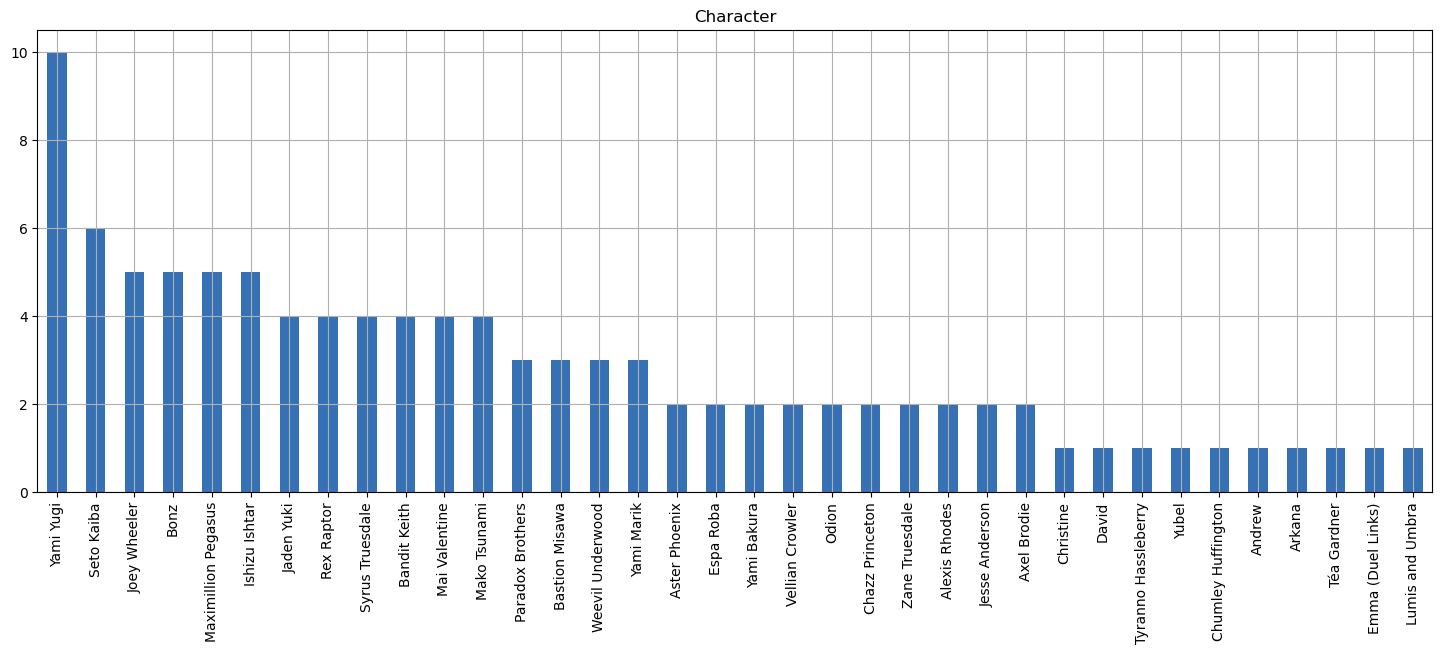

In [11]:
skill_color = colors_dict['Skill Card']
skill_df['Character'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=90, color = skill_color, title = 'Character')
plt.show()

### Property

In [12]:
print('Total number of properties:', skill_df['Property'].nunique())

Total number of properties: 3


In [13]:
skill_df.groupby('Property').nunique()

,Name,Card type,Archseries,Character,TCG status,TCG Speed Duel status,Page name,Page URL,Modification date
Property,,,,,,,,,
Continuous Spell Card,2,1,1,2,1,1,2,2,2
Continuous Trap Card,1,1,0,1,1,1,1,1,1
Field Spell Card,10,1,2,10,1,1,10,10,10


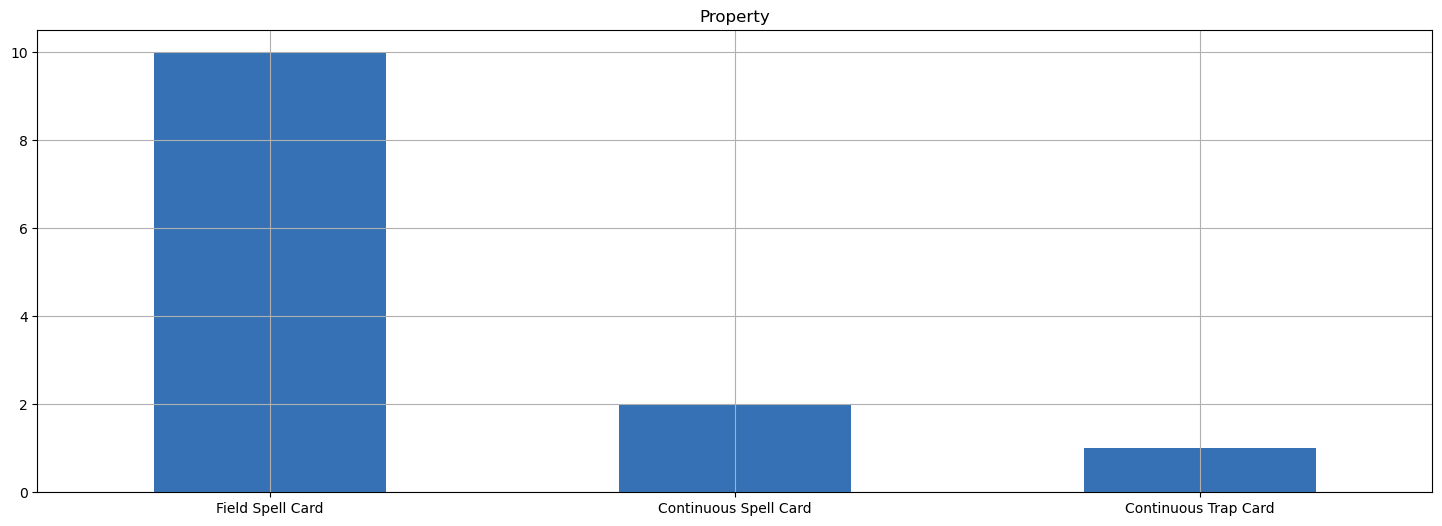

In [14]:
skill_color = colors_dict['Skill Card']
skill_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = skill_color, title = 'Property')
plt.show()

## Property

In [15]:
print('Total number of properties:', full_df['Property'].nunique())

Total number of properties: 9


In [16]:
full_df.groupby('Property').nunique()

,Name,Password,Card type,Archseries,Attribute,Primary type,Secondary type,Monster type,Effect type,DEF,ATK,Level/Rank,TCG status,OCG status,TCG Speed Duel status,Page name,Page URL,Artwork,Modification date,Character
Property,,,,,,,,,,,,,,,,,,,,
Continuous Spell Card,29,27,2,14,0,0,0,0,10,0,0,0,3,2,2,29,29,2,29,2
Continuous Trap Card,30,29,2,10,0,0,0,0,15,0,0,0,2,1,3,30,30,1,30,1
Counter Trap Card,11,11,1,1,0,0,0,0,3,0,0,0,1,1,1,11,11,1,11,0
Equip Spell Card,40,40,1,10,0,0,0,0,11,0,0,0,1,1,1,40,40,1,40,0
Field Spell Card,30,20,2,8,0,0,0,0,9,0,0,0,2,1,2,30,30,1,30,10
Normal Spell Card,100,100,1,19,0,0,0,0,16,0,0,0,2,2,2,100,100,2,100,0
Normal Trap Card,98,98,1,11,0,0,0,0,18,0,0,0,1,1,1,98,98,2,96,0
Quick-Play Spell Card,19,19,1,4,0,0,0,0,6,0,0,0,1,2,2,19,19,1,19,0
Ritual Spell Card,11,11,1,4,0,0,0,0,2,0,0,0,1,1,1,11,11,1,11,0


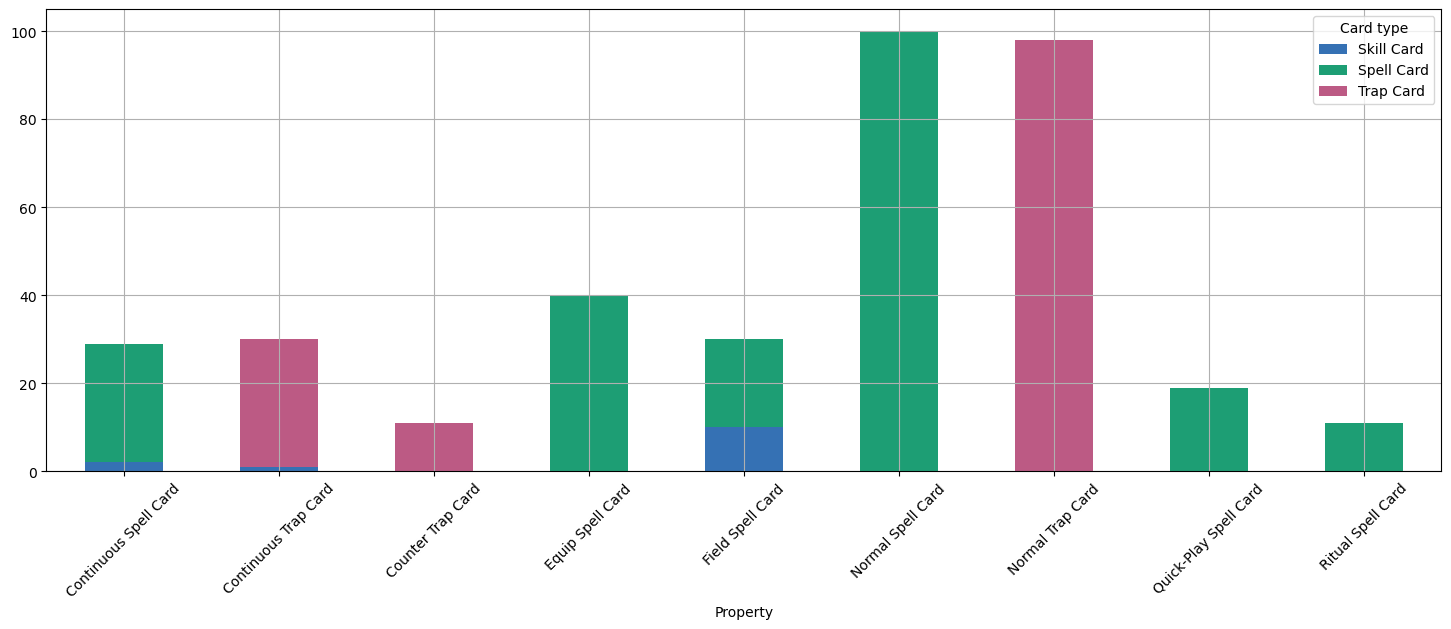

In [17]:
property_unstack = full_df.groupby('Property')['Card type'].value_counts().unstack()
skill_st_colors = [colors_dict[i] for i in property_unstack.columns]
property_unstack.plot.bar(figsize = (18,6), stacked=True, grid = True, rot=45, color = skill_st_colors)
plt.show()

## Archseries

In [18]:
exploded_archseries = full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 151


In [19]:
exploded_archseries.groupby('Archseries').nunique()

,Name,Password,Card type,Property,Attribute,Primary type,Secondary type,Monster type,Effect type,DEF,ATK,Level/Rank,TCG status,OCG status,TCG Speed Duel status,Page name,Page URL,Artwork,Modification date,Character
Archseries,,,,,,,,,,,,,,,,,,,,
-Eyes Dragon,4,4,1,0,2,3,0,1,1,3,3,4,1,1,2,4,4,1,4,0
A-to-Z,11,11,1,0,1,3,1,1,3,9,10,3,1,1,1,11,11,2,11,0
Abyss-,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0
Aged counterpart,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0
Ally of Justice,2,2,1,0,1,2,0,1,1,2,2,2,1,1,1,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wingman,3,3,1,0,3,1,0,1,3,3,3,2,1,1,2,3,3,0,3,0
Worm,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,0
Zombie counterpart,4,4,2,1,1,1,0,1,1,1,3,2,1,1,1,4,4,0,4,0


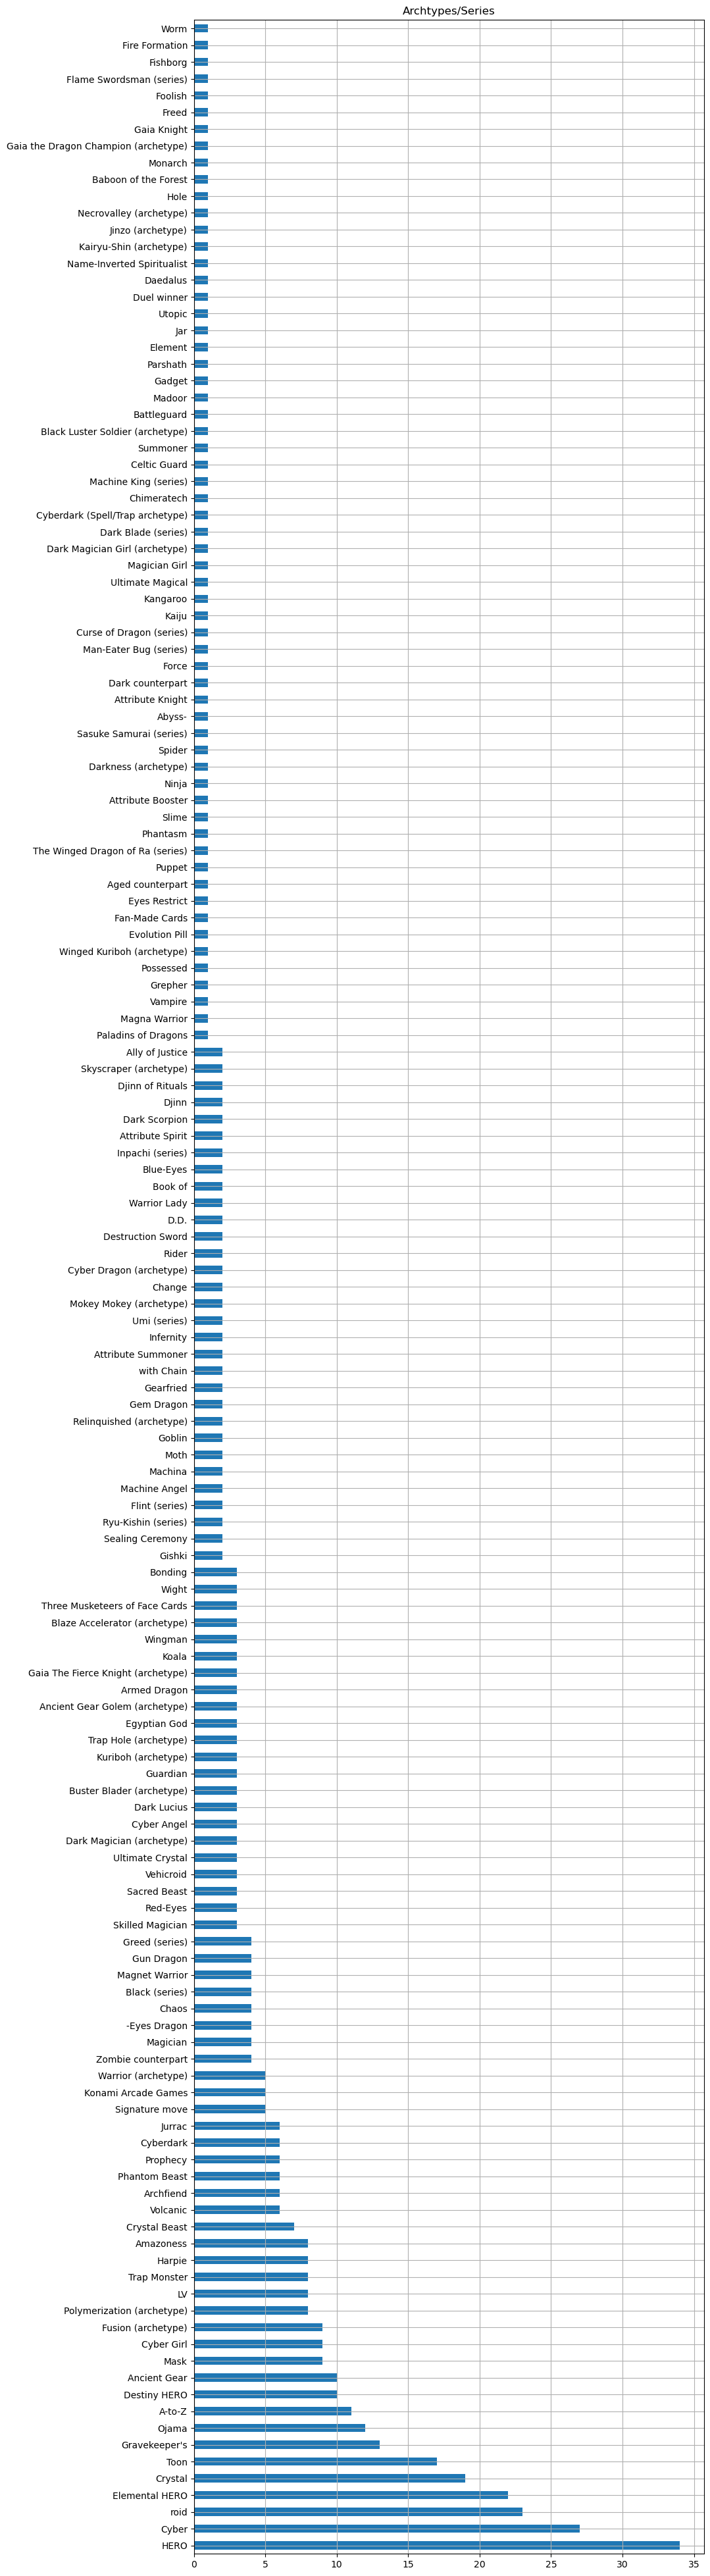

In [20]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,50), grid = True, title = 'Archtypes/Series')
plt.show()

## TCG Speed Duel status

In [21]:
print('Total number of TCG Speed Duel status:', full_df['TCG status'].nunique())

Total number of TCG Speed Duel status: 4


In [22]:
full_df.groupby('TCG Speed Duel status', dropna=False).nunique()

,Name,Password,Card type,Property,Archseries,Attribute,Primary type,Secondary type,Monster type,Effect type,DEF,ATK,Level/Rank,TCG status,OCG status,Page name,Page URL,Artwork,Modification date,Character
TCG Speed Duel status,,,,,,,,,,,,,,,,,,,,
Legal,103,0,1,3,18,0,0,0,0,0,0,0,0,1,0,103,103,0,103,36
Not yet released,9,9,3,3,6,3,2,0,5,8,5,5,4,1,2,9,9,1,9,0
Unlimited,884,881,3,9,157,7,4,4,20,105,45,55,12,3,3,884,884,3,881,0


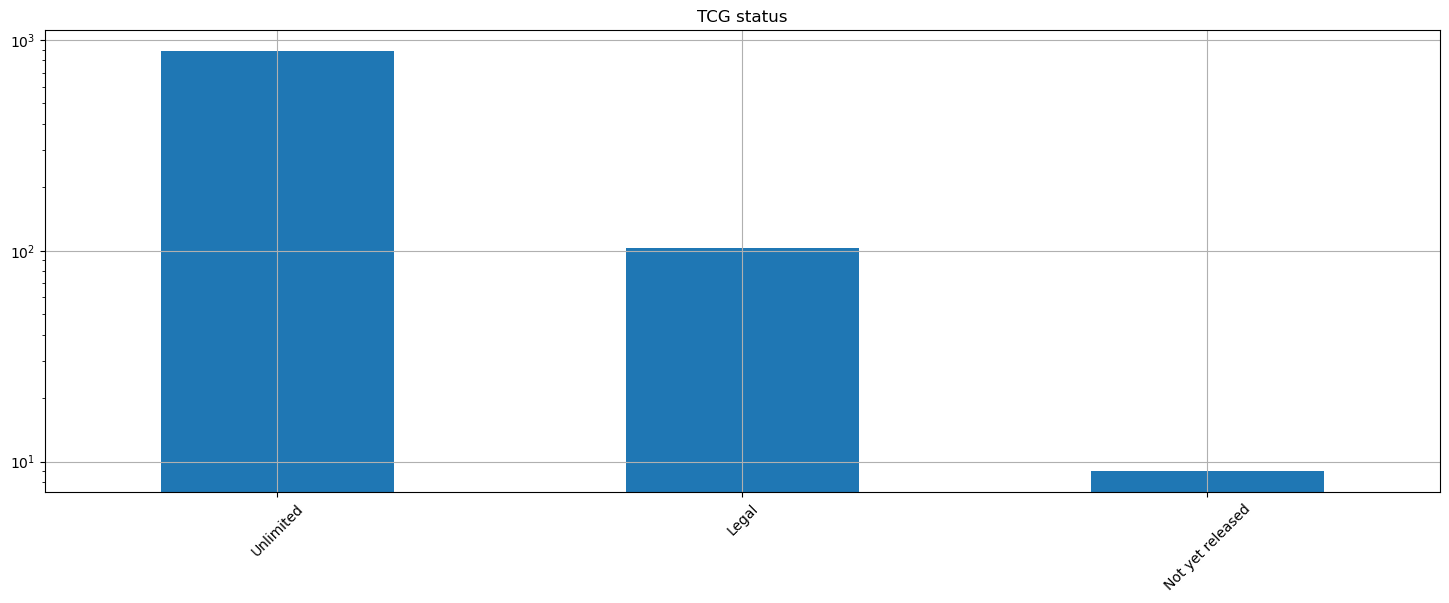

In [23]:
full_df['TCG Speed Duel status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [24]:
# Remove unlimited
tcg_speed_crosstab = pd.crosstab(full_df['Card type'], full_df['TCG Speed Duel status'])
tcg_speed_crosstab

TCG Speed Duel status,Legal,Not yet released,Unlimited
Card type,,,
Monster Card,0,6,532
Skill Card,103,0,0
Spell Card,0,2,215
Trap Card,0,1,137


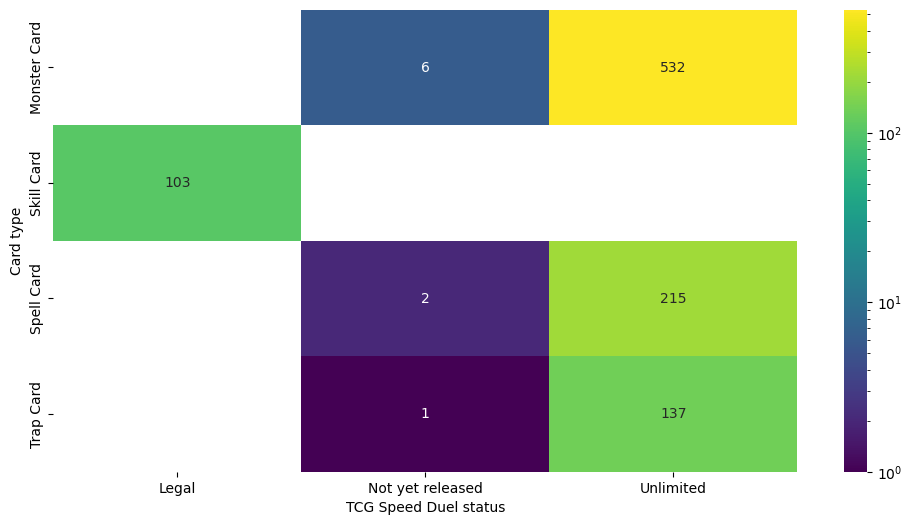

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_speed_crosstab[tcg_speed_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [26]:
# Remove unlimited
tcg_speed_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['TCG Speed Duel status'])
tcg_speed_crosstab_b

TCG Speed Duel status,Not yet released,Unlimited
Monster type,,
Aqua,0,10
Beast,0,31
Beast-Warrior,0,13
Dinosaur,0,27
Divine-Beast,0,3
Dragon,1,35
Fairy,0,25
Fiend,1,61
Fish,0,5


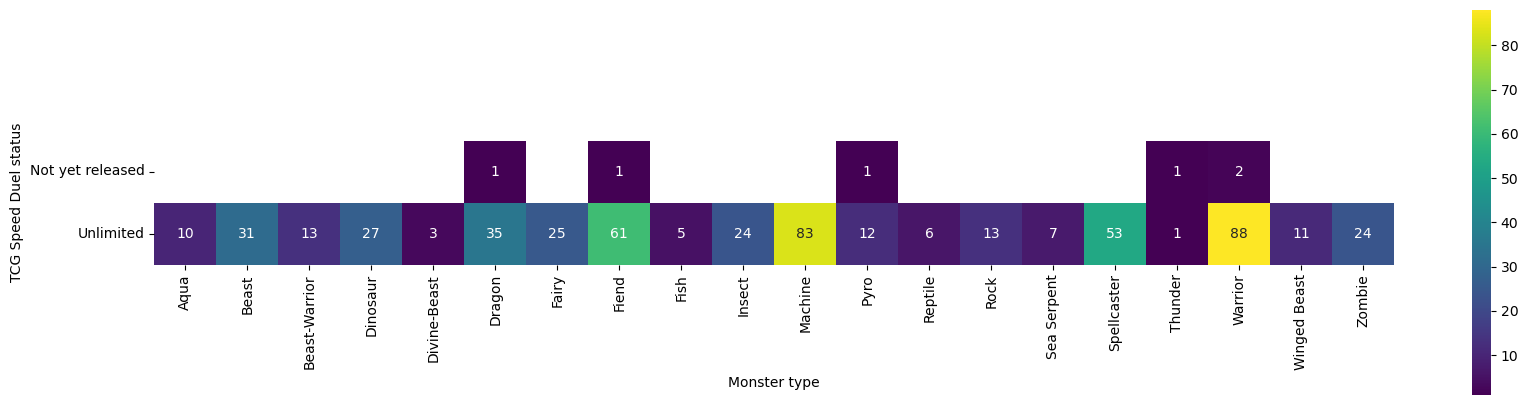

In [27]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_speed_crosstab_b[tcg_speed_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [28]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'], exploded_archseries['TCG Speed Duel status'], margins = True)
tcg_crosstab_c

TCG Speed Duel status,Legal,Not yet released,Unlimited,All
Archseries,,,,
-Eyes Dragon,0,1,3,4
A-to-Z,0,0,11,11
Abyss-,0,0,1,1
Aged counterpart,0,0,1,1
Ally of Justice,0,0,2,2
...,...,...,...,...
Worm,0,0,1,1
Zombie counterpart,0,0,4,4
roid,2,0,21,23


### TCG Speed Duel vs. TCG status

In [29]:
cg_crosstab = pd.crosstab(full_df['TCG status'],full_df['TCG Speed Duel status'], dropna=False, margins = False)
cg_crosstab

TCG Speed Duel status,Legal,Not yet released,Unlimited
TCG status,,,
Illegal,103,0,0
Limited,0,0,2
Semi-Limited,0,0,2
Unlimited,0,9,880


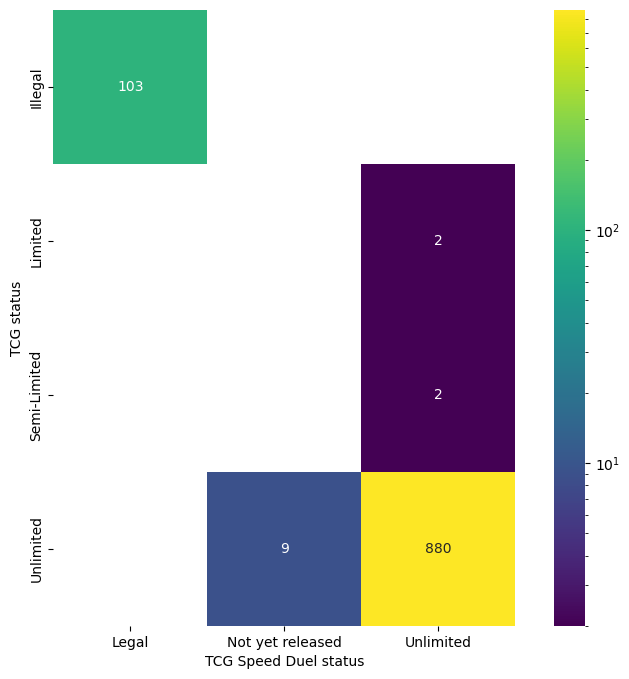

In [30]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Epilogue

In [31]:
benchmark('speed',timestamp)

In [32]:
footer()

<div align='right'>
    Execution completed 19/02/2023 19:04 UTC
</div>

## HTML export

In [33]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk


In [34]:
! jupyter nbconvert Speed.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Speed.ipynb to HTML


[NbConvertApp] Writing 1442079 bytes to ../Speed.html


## Git

In [ ]:
! git add "../*[Ss]peed*"

In [ ]:
! git commit -m {"'Speed duel update-" + timestamp.isoformat() + "'"}